# K-Nearest Neighbour (KNN)
Data : white_wine.csv
How :
- Apply KNN Method (k = 3)
    - target : quality (quality > 6 -> Y = 1 good, Y = 0 bad)
    - features : density alcohol
- Validate model using accuracy in 20% testing data
- Apply scaling and Validate model using accuracy in 20% testing data
- Apply scaling choose factor k based on accuracy:
    - K =(1, 3, 5, ..., 29)

## Import Library & Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\user\Documents\Data Science\What is Classification_\white_wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


## Feature Engineering

In [3]:
df['label'] = np.where(df['quality'] > 6, 1, 0) # change value to 1 for quality > 6 and 0 for quality <= 6
df[['quality', 'label']]

,quality,label
0,6.0,0
1,6.0,0
2,6.0,0
3,6.0,0
4,6.0,0
...,...,...
515,6.0,0
516,5.0,0
517,6.0,0
518,6.0,0



## Exploratory Data Analysis (EDA)

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='density', ylabel='alcohol'>

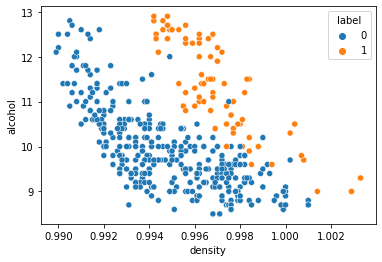

In [6]:
sns.scatterplot(x = 'density', y = 'alcohol',data = df, hue = 'label') # plotting correlation between density and alcohol as feature

In [8]:
df[['alcohol', 'density']].isnull().sum() # check for missing value

alcohol    1
density    0
dtype: int64

In [11]:
df['alcohol'].fillna(df['alcohol'].mean(), inplace=True) # missing value handling with mean imputer
df[['alcohol', 'density']].isnull().sum()

alcohol    0
density    0
dtype: int64


## Data Splitting


In [12]:
from sklearn.model_selection import train_test_split

In [14]:
x = df[['alcohol', 'density']] # feature
y = df['label'] # target

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2020) # data splitting


## Scaling
scaler.fit just for train set

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler() # scaler definition
scaler.fit(x_train) # fitting model
x_train_scaled = scaler.transform(x_train) # X train scaled
x_test_scaled = scaler.transform(x_test) # X test scaled


## Model without Scaling

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [22]:
knn = KNeighborsClassifier(n_neighbors = 3) # define model
knn.fit(x_train, y_train) # fitting model for training set

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred_class = knn.predict(x_test) # y prediciton 

In [33]:
, accuracy_score(y_test,y_pred_class)*100, '%')

Model accuracy in test dataset: 92.3076923076923 %



## Model with Scaling

In [34]:
knn_scaled =  KNeighborsClassifier(n_neighbors = 3) # define model
knn_scaled.fit(x_train_scaled, y_train) # fitting model for scaled training set

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred_class_scaled = knn_scaled.predict(x_test_scaled) # y prediciton scaled

In [36]:
print('Model accuracy in test dataset:', accuracy_score(y_test,y_pred_class_scaled)*100, '%')

Model accuracy in test dataset: 97.11538461538461 %


Accuracy score better when the dataset already scaled
________
## Choose Best K-Factor
k-factor : 1, 3, 5, 7, ... , 29

In [37]:
import matplotlib.pyplot as plt

In [41]:
k = range(1, 30, 2) # 1 3 5 7 .... 29 for k value
testing_accuracies = []
training_accuracies = []
score = 0

for i in k: # iteration to choose best k value
    knn = KNeighborsClassifier(n_neighbors = i) # model definition
    knn.fit(x_train_scaled, y_train) # model training
    
    y_pred_train = knn.predict(x_train_scaled) # y prediction for train set
    acc_train = accuracy_score(y_train, y_pred_train) # model accuracy for train set
    training_accuracies.append(acc_train)
    
    y_pred_test = knn.predict(x_test_scaled) # y prediction for test set
    acc_test = accuracy_score(y_test, y_pred_test) # model accuracy for test set
    testing_accuracies.append(acc_test)
    
    if score < acc_test: # choose best k value
        score = acc_test
        best_k = i

In [43]:
print('Best k factor :', best_k)
print('Score :', score)

Best k factor : 7
Score : 0.9807692307692307


C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\

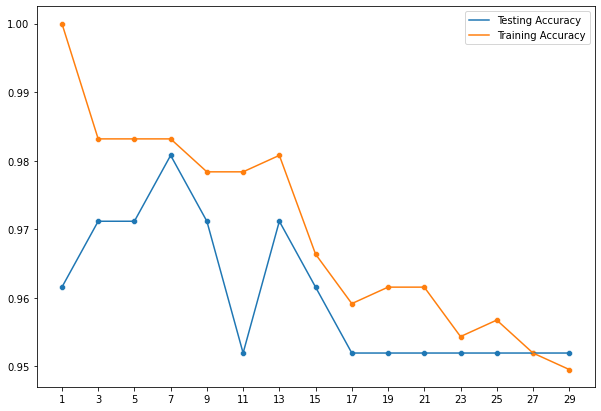

In [47]:
# Ploting accuracy score from train and test set
plt.figure(figsize = (10,7))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['Testing Accuracy', 'Training Accuracy'])
plt.xticks(list(k))
plt.show()